# Analisis Exploratorio de datos 

Al tener como objetivo evaluar cómo las características técnicas de las canciones (ej. energía, bailabilidad, acústica) se correlacionan con la popularidad en Spotify, para identificar patrones que puedan optimizar las estrategias de producción musical para disqueras y artistas.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set_palette("pastel")

In [101]:
df = pd.read_csv('dataset.csv') 
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [103]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


El dataset tiene 114,000 canciones con 21 variables y métricas de popularidad. Como pequeños hallazgos notables en este descriptivo es que la popularidad tiene un sesgo hacia valores bajos, con una media de 33.24/100 (±22.31) y mediana de 35.
Con este descriptivo vamos a llevar a cabo los pasos para identificar la características de las canciones exitosas dependiendo de la variable Popularidad y con estos resultados dar las recomendaciones específicas.

Al encontrar una alerta de posibles nulos y duplicados, hacemos un tratamiento más detallado de ellos.

In [104]:
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminamos columna innecesaria si existe
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Verificamos duplicados
print("\nNúmero de duplicados:", df.duplicated().sum())

# Eliminar duplicados si los hay
df = df.drop_duplicates()

# Verificar valores únicos en las columnas categóricas
print("\nValores únicos en track_genre:", df['track_genre'].nunique())
print(df['track_genre'].value_counts().head(10))


Valores nulos por columna:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Número de duplicados: 450

Valores únicos en track_genre: 114
track_genre
acoustic       1000
british        1000
electronic     1000
emo            1000
funk           1000
garage         1000
disco          1000
country        1000
rock           1000
rock-n-roll    1000
Name: count, dtype: int64


Encontramos en la base 3 nulos que debemos tratar para así observar mejor los datos:

In [105]:
for col in ['artists', 'album_name', 'track_name']:
    df[col] = df[col].fillna(f"Missing_{col}")
    print(df.isnull().sum()) 

track_id            0
artists             0
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
track_id            0
artists             0
album_name          0
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
track_id            0
artists             0
album_name          0
track_name          0
popula

Analizamos Datos Atípicos:

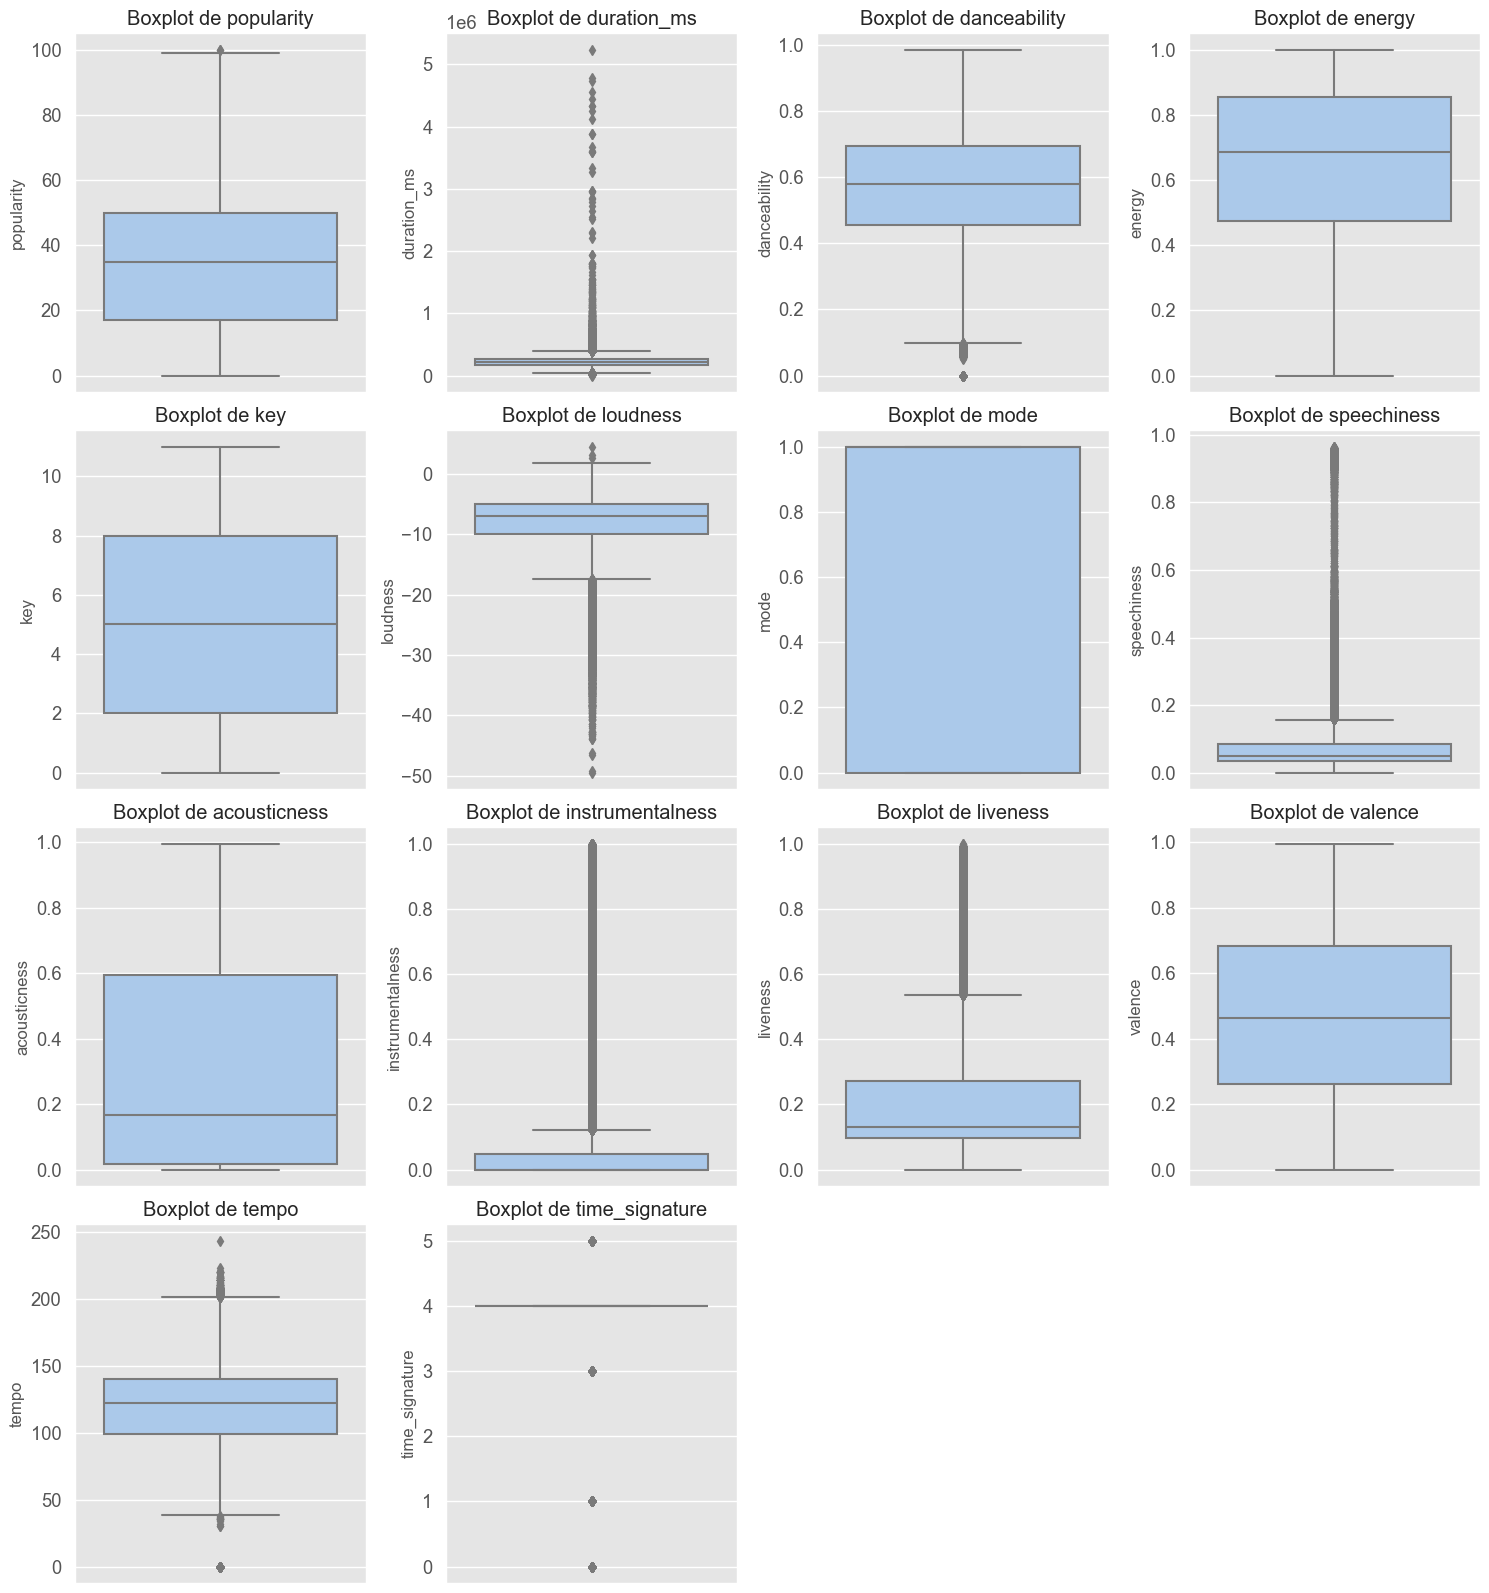

In [106]:
# Librerias necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
def plot_outliers(df, columns):
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(columns):
        plt.subplot(5, 4, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col}')
        plt.tight_layout()
    plt.show()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_outliers(df, numeric_cols)

Haciendo un analisis de cada una de las variables con base a los boxplots de Outliers es, primero, duración (en milisegundos) es que hay canciones que duran más que 5,000,000 ms, siendo aproximadamente unos 83 minutos, algo excepcional.

Segundo, la instrumentalidad las canciones con más popularidad no son 100% instrumentales porque la mayoría, siendo el 75%, está por debajo de aproximadamente 0.049.

Y tercero, el compás (time_signature), casi el 100% está en 4/4, lo que significa que todas las canciones de la mayoría de géneros comparten un mismo compás pues influye en que todas empiencen igual. Se haría un estudio de la historia de esta variable desde tiempos antiguos pues no tiene un cambio en las canciones sin importar su género.

In [107]:
# Normalidad Kolmogrov
from scipy.stats import kstest

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
results = []

for col in numeric_cols:
    data = df[col].dropna()  # Eliminar NA
    if len(data) > 0:  
        mean, std = data.mean(), data.std()
        ks_stat, p_value = kstest(data, 'norm', args=(mean, std))
        
        results.append({
            'Variable': col,
            'N muestras': len(data),
            'KS Statistic': ks_stat,
            'p-value': p_value,
            'Normal (α=0.05)': p_value > 0.05
        })
results_df = pd.DataFrame(results)
print("\n=== Resultados KS (Datos Originales, sin Imputación) ===")
print(results_df.to_string(index=False))
non_normal_vars = results_df[results_df['Normal (α=0.05)'] == False]['Variable'].tolist()
print("\nVariables NO normales (p < 0.05):", non_normal_vars)



=== Resultados KS (Datos Originales, sin Imputación) ===
        Variable  N muestras  KS Statistic       p-value  Normal (α=0.05)
      popularity      113550      0.087285  0.000000e+00            False
     duration_ms      113550      0.126856  0.000000e+00            False
    danceability      113550      0.032712 5.333600e-106            False
          energy      113550      0.077317  0.000000e+00            False
             key      113550      0.134937  0.000000e+00            False
        loudness      113550      0.125070  0.000000e+00            False
            mode      113550      0.412280  0.000000e+00            False
     speechiness      113550      0.280316  0.000000e+00            False
    acousticness      113550      0.172907  0.000000e+00            False
instrumentalness      113550      0.394205  0.000000e+00            False
        liveness      113550      0.200507  0.000000e+00            False
         valence      113550      0.047247 1.021882e-2

Al darnos cuenta que no son normales, se hizo una imputación de los datos con la media como medida para evaluar simetría de ciertos datos. Pero fuera de este EDA se hizo tal evaluación y no dieron normales, por lo cual no dio indicios de problemas con los Outliers, por lo que preferimos la imputación con la mediana pues la media distorsiona esos dattos atípicos. Esto dió lo siguiente:

In [108]:
from tqdm import tqdm
from scipy.stats import kstest
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

results = []
for genre in tqdm(df['track_genre'].unique(), desc="Analizando géneros"):
    genre_data = df[df['track_genre'] == genre]
    
    
    if len(genre_data) >= 3:
        for col in numeric_cols:
            col_data = genre_data[col].dropna()  
            
            
            if len(col_data) >= 3:
                mu, sigma = col_data.median(), col_data.std()
                
                
                D_stat, p_value = kstest(col_data, 'norm', args=(mu, sigma))
                
                results.append({
                    'track_genre': genre,
                    'variable': col,
                    'p_value': p_value,
                    'normalidad': 'Normal' if p_value > 0.05 else 'No Normal'
                })

normality_df = pd.DataFrame(results)

generos_normales = normality_df[normality_df['normalidad'] == 'Normal']

print("\n=== Resultados de Normalidad por Género y Variable ===")
print(generos_normales.to_string(index=False))

Analizando géneros:   0%|          | 0/114 [00:00<?, ?it/s]

Analizando géneros: 100%|██████████| 114/114 [00:02<00:00, 54.13it/s]


=== Resultados de Normalidad por Género y Variable ===
      track_genre     variable  p_value normalidad
         acoustic danceability 0.076410     Normal
         alt-rock danceability 0.327366     Normal
      alternative danceability 0.100550     Normal
            anime danceability 0.378724     Normal
      black-metal        tempo 0.295729     Normal
        bluegrass danceability 0.057491     Normal
        bluegrass       energy 0.059848     Normal
        bluegrass        tempo 0.150956     Normal
           brazil danceability 0.073358     Normal
           brazil       energy 0.519781     Normal
        breakbeat danceability 0.055518     Normal
         cantopop danceability 0.433997     Normal
         children  duration_ms 0.083263     Normal
            chill  duration_ms 0.062499     Normal
            chill       energy 0.066685     Normal
        classical danceability 0.359418     Normal
             club danceability 0.593333     Normal
           comedy      val

Los resultados arrojados nos muestran que hay normalidad en casi todos los géneros.

Los siguiente fue hacer los graficos de distribución de las variables para visualizar sus comportamientos:

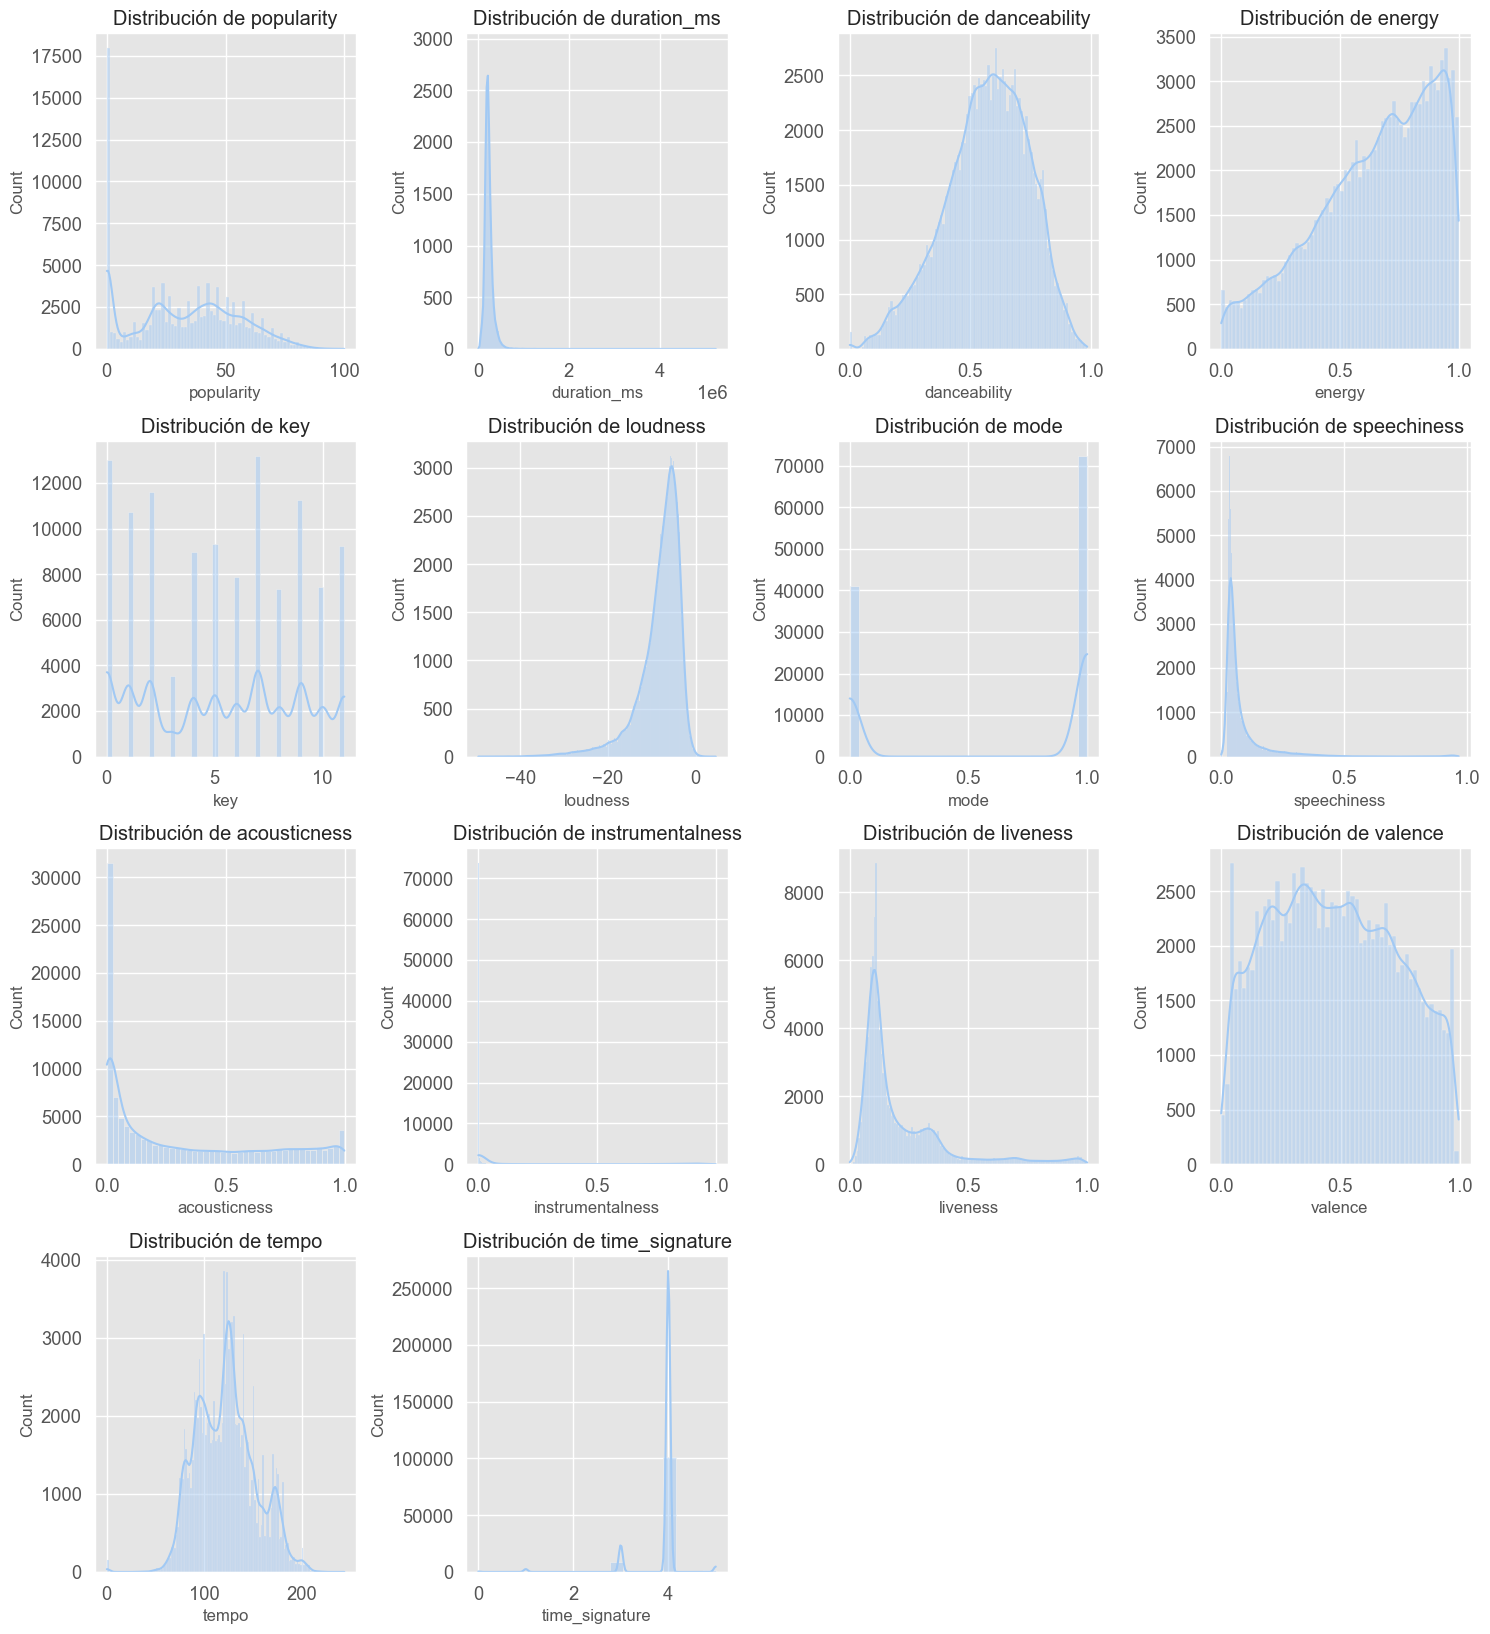

In [109]:
# Distribución de todas las variables
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
def plot_distributions(df, columns):
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(columns):
        plt.subplot(5, 4, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribución de {col}')
        plt.tight_layout()
    plt.show()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_distributions(df, numeric_cols)

Por lo visto en las gráficas podemos visualizar que para la popularidad solo un pequeña subida, es decir, pocas canciones alcanzan alta popularidad.

En cuanto a la duración de las canciones la mayoría dura entre 2-4 minutos.

Para la variable Key no se ve una preferencia por alguna tonalidad en general.

En volumen podemos inferir que las canciones más escuchadas y que alcanzan un pico alto están entre -6 a -4 dB.

Las canciones más bailables tienen un ritmo por encima de (aprox.) 0.45 y y son más comunes la que tienen una alta energía, un tanto mayor a 0.7, como las playlist de ejercicio para los centros educativos o GYMs.

En cuanto a la acústica se ve un pico en 0 y entre 0.8 a 1, lo cual significa que el sonido debe ser puro. Y en las instrumentales no hay un pico significativo desde los 0.5, por lo cual son pocas canciones que lo tienen. 

En la variable Tempo la mayoría de las canciones tienen un número de pulsaciones o latidos entre los 100 BPM A 140 BPM.

Como nuestra variable predictora es la popularidad de las canciones, atribuimos a fondo su investigación y repercusión en el estudio de nuestro Analisis Exploratorio. Por ello vemos de cerca su distribución:

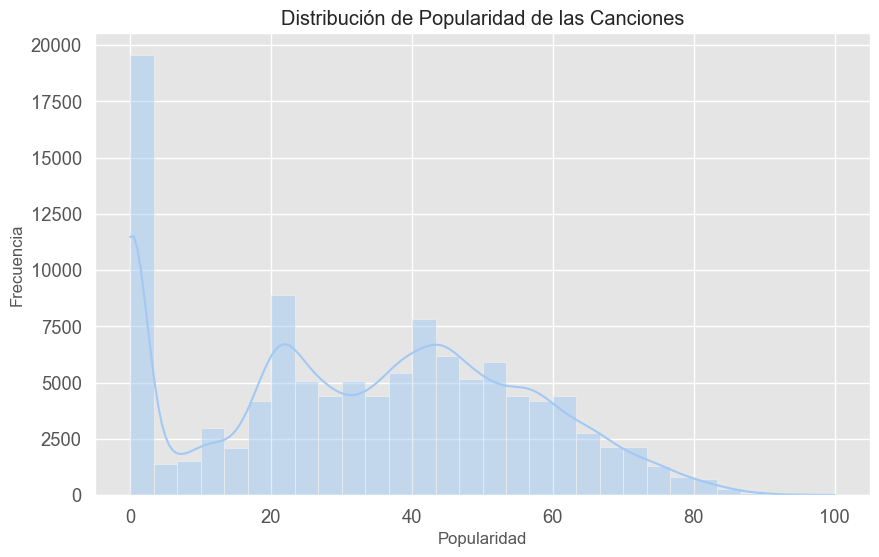


Estadísticas de popularidad:
count    113550.000000
mean         33.324139
std          22.283976
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64


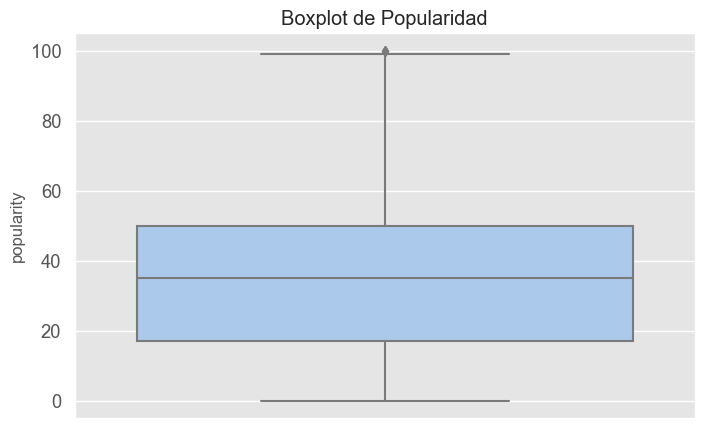

In [110]:
# Análisis de la distribución de Popularidad
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribución de Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de popularity
print("\nEstadísticas de popularidad:")
print(df['popularity'].describe())

# Boxplot de popularity
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['popularity'])
plt.title('Boxplot de Popularidad')
plt.show()

De acuerdo con el gráfico de distribución podemos notar que la mayoría de las canciones tienen popularidad menos que 60, después decae, por lo cual son muy pocas las canciones que llegan a tener una alta popularidad, y por su descriptivo se confirma una asimetría con cola a la derecha, es decir, muchos atípicos mayores a 50 y son los que más rapido llegan a tener una gran popularidad.

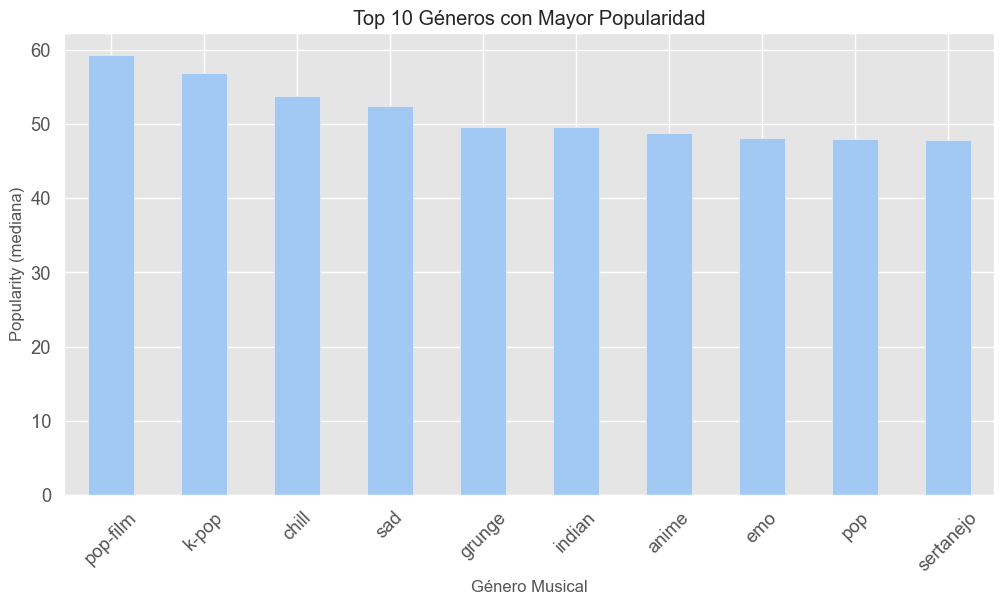

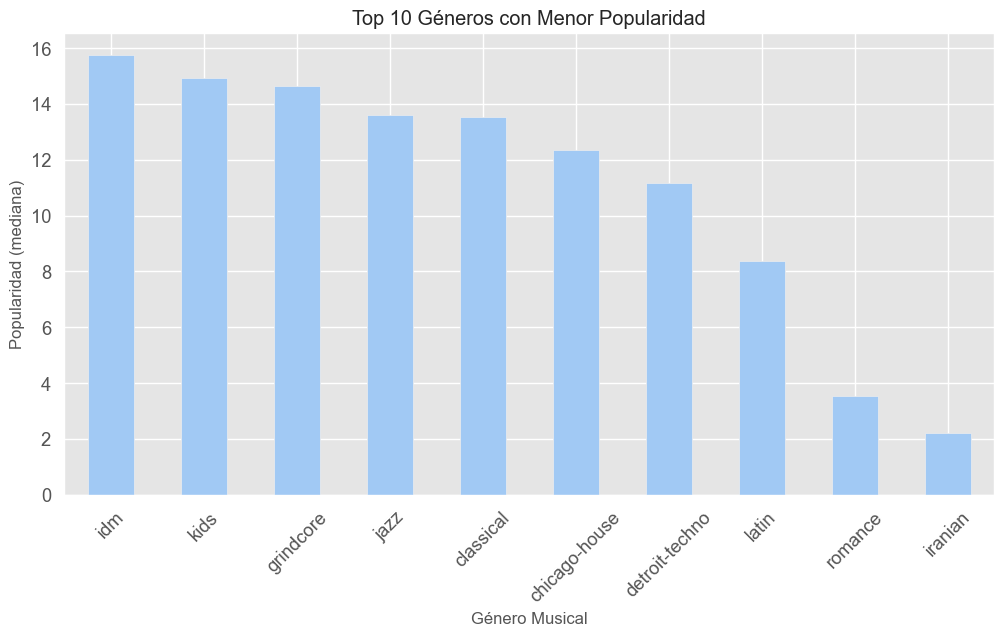

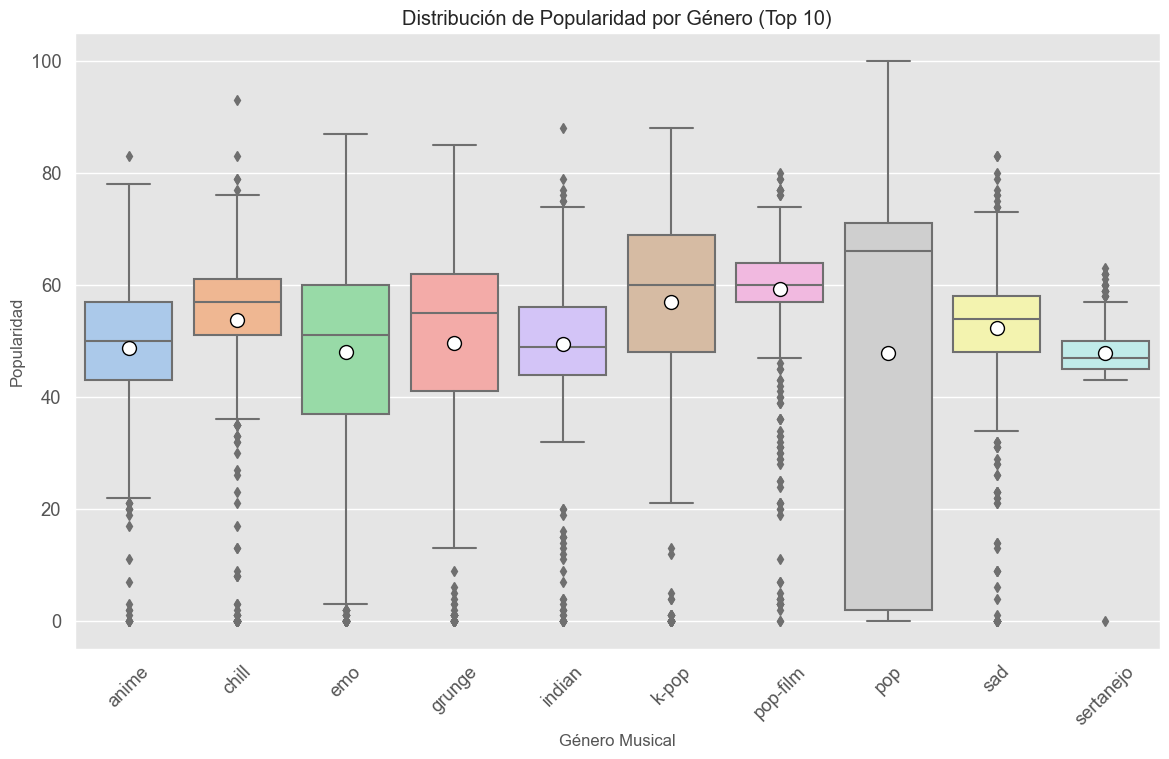

In [111]:
import matplotlib.pyplot as plt
popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
popularity_by_genre.head(10).plot(kind='bar')
plt.title('Top 10 Géneros con Mayor Popularidad')
plt.xlabel('Género Musical')
plt.ylabel('Popularity (mediana)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
popularity_by_genre.tail(10).plot(kind='bar')
plt.title('Top 10 Géneros con Menor Popularidad')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad (mediana)')
plt.xticks(rotation=45)
plt.show()

# Boxplot para los principales géneros
top_genres = popularity_by_genre.head(10).index
df_top_genres = df[df['track_genre'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', data=df_top_genres, 
            showmeans=True,  # Esto muestra la media como un marcador
            meanprops={"marker":"o",  # Forma del marcador
                       "markerfacecolor":"white",  # Color interno
                       "markeredgecolor":"black",  # Color del borde
                       "markersize":"10"})  # Tamaño
plt.title('Distribución de Popularidad por Género (Top 10)')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.show()


Analizando el Top de los 10 géneros con mayor popularidad vemos preferencias en estos géneros: 
- Pop 

- K-pop 

- Pop-film 

- Dance-pop 

Por lo cual para las disqueras se les recomienda invertir más en estos géneros.

Mientras que en el top de los 10 géneros con menor popularidad como el Grimbton, Kids, Classical e Iranian tiene un bajo rendimiento en Spotify, por lo cual se les recomienda usar otras app o páginas que los impulsen.

Y en la distribución de popularidad por género el K-pop mtiene alta popularidad y algunos temas de géneros menos populares como señanajo logran alta popularidad.

Matriz de correlación: (14, 14)


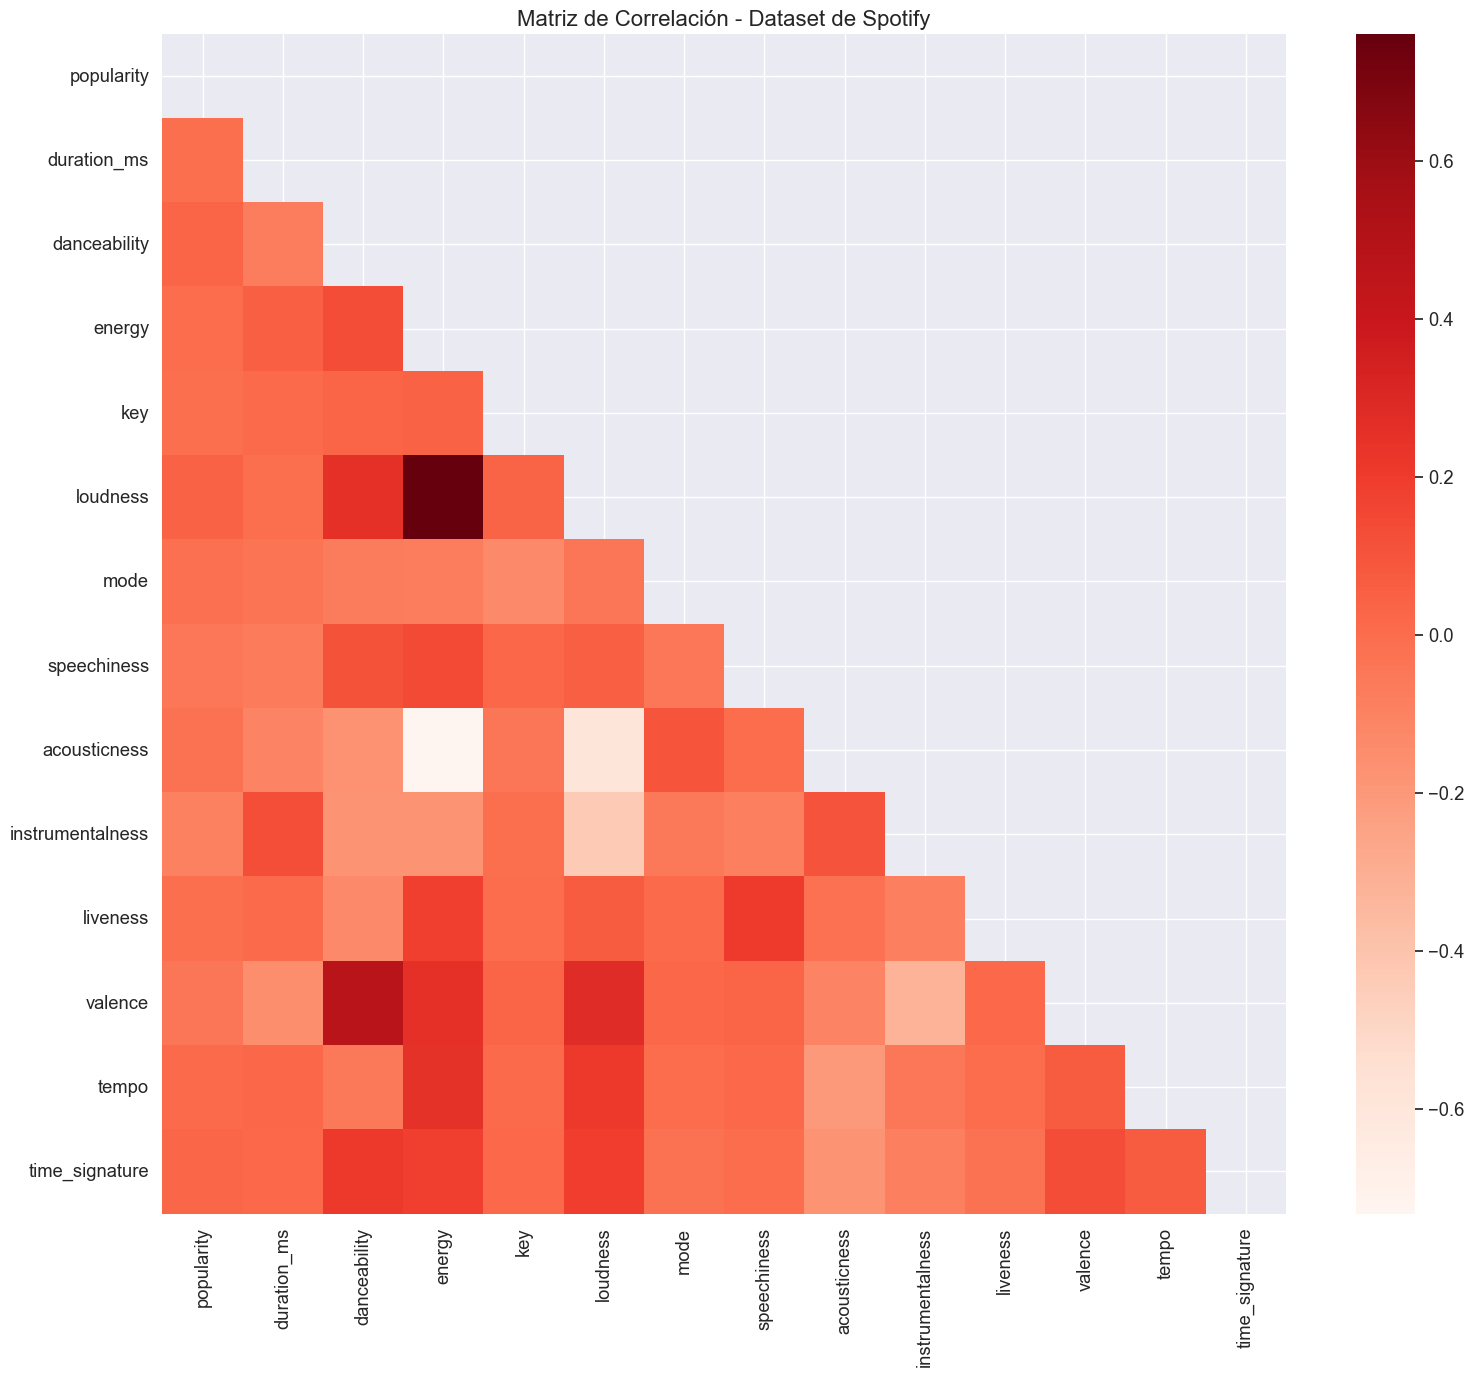

In [112]:
# Calcular la matriz de correlación
spotify_num = df.select_dtypes(include=np.number)

corr = spotify_num.corr()
print("Matriz de correlación:", corr.shape)

# Crear la máscara para ocultar la mitad superior
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Configurar el estilo y mostrar el mapa de calor
sns.set(font_scale=1.2)
plt.figure(figsize=(16, 14))
sns.heatmap(corr, mask=mask, cmap='Reds', annot=True, fmt='.2f', annot_kws={"size": 12}, cbar=True)
plt.title("Matriz de Correlación - Dataset de Spotify", fontsize=16)
plt.tight_layout()
plt.show()

Aquí podemos ver las correlaciones más significativas entre variables como la energía y volumen pues muchas canciones energéticas tienden a tener un alto volumen.

Tambien entre la acástica y la energía con Volumen pues al ser más "movidas" contienen una acústica más alta.

Mientras la popularidad, siendo nuestra variable predictora, tiene correlaciones medias con las anteriormente mencionadas pues las canciones populares tienden a ser más altas en volumen pero algunas con acústicas son menos populares.

Y las correlaciones más bajas, siendo entre variables como Key, time_signature y tempo no influye en la popularidad de las canciones.

Al evaluar estos comportamientos, hicimos un análisis PCA para ver más detalladamente la variabilidad de estas variables:

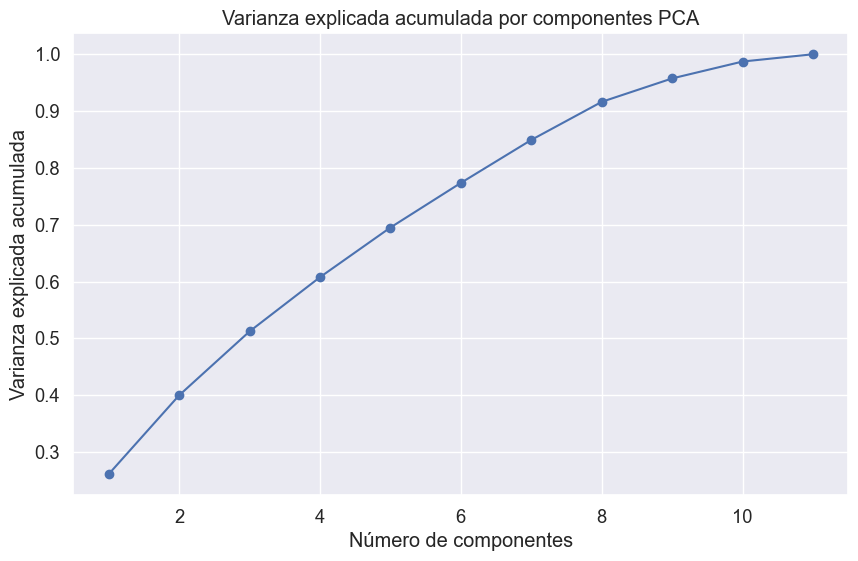

In [113]:
# Análisis PCA
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(['key', 'mode', 'time_signature'], axis=1)
numeric_df = numeric_df.fillna(numeric_df.mean())

# Estandarización
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
pca = PCA()
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza explicada acumulada por componentes PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

Viendo este patrón junto con los datos musicales volvimos a ver la correlación entre la energía y el volumen, correlacionado y relación entre bailabilidad y positividad (valence).

In [114]:
# Analisis VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
spotify_num = df.select_dtypes(include=np.number)

# Eliminar columnas que no tienen suficiente varianza (opcional)
spotify_num = spotify_num.dropna(axis=1)  # Por si hay columnas con NaN

# Escalar los datos antes de calcular VIF
scaler = StandardScaler()
spotify_scaled = scaler.fit_transform(spotify_num)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = spotify_num.columns
vif_data["VIF"] = [variance_inflation_factor(spotify_scaled, i) for i in range(spotify_scaled.shape[1])]

# Mostrar el resultado
print(vif_data.sort_values(by="VIF", ascending=False))

            Variable       VIF
3             energy  4.249848
5           loudness  3.269293
8       acousticness  2.407126
11           valence  1.586171
2       danceability  1.540188
9   instrumentalness  1.474825
10          liveness  1.142463
7        speechiness  1.132767
12             tempo  1.091453
13    time_signature  1.080963
1        duration_ms  1.055228
6               mode  1.042076
0         popularity  1.023728
4                key  1.021432


Podemos notar que todas las variables tienen un valor VIF entre 1 a 5, lo que indica que no hay problemas graves de multicolinealidad.

Luego, hicimos una analisis de correlación más a fondo de nuestra variable predictora:

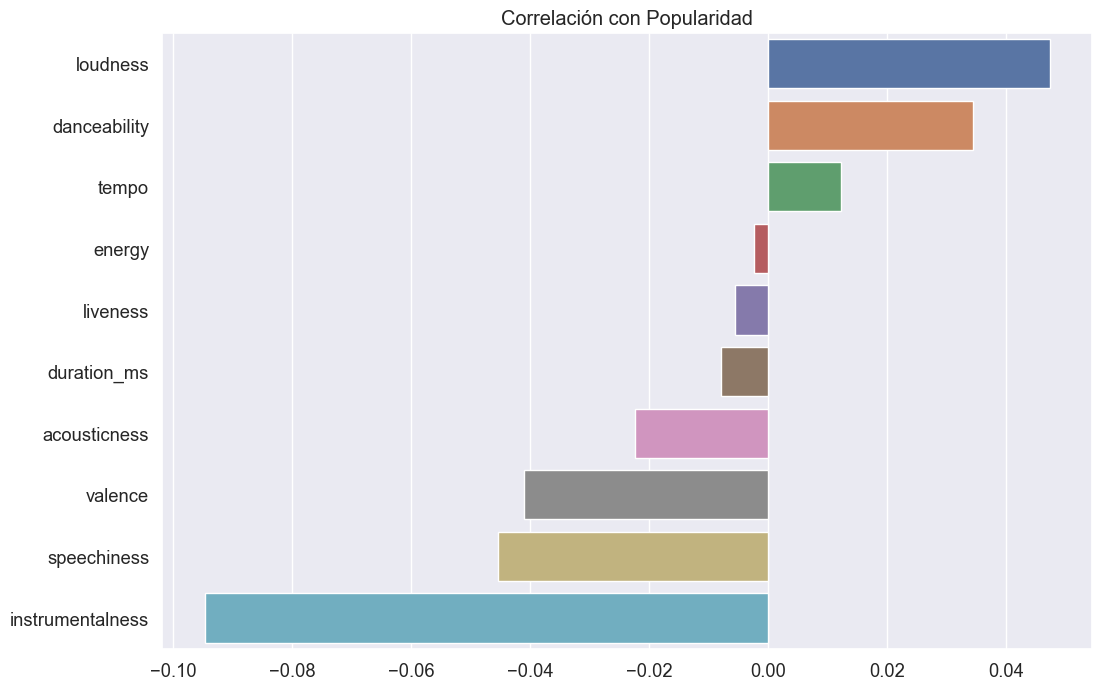

In [115]:
# Correlaciones con popularidad
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()['popularity'].sort_values(ascending=False)[1:]
sns.barplot(y=corr.index, x=corr.values)
plt.title('Correlación con Popularidad')
plt.show()

Visto en el gráfico, volvemos a ver más de cerca una mayor correlación con nuestra variable predictora con:

- Volumen
- Bailabilidad
- Energía 

Es decir, canciones que contengas un mayor volumen y que contengan ritmos bailables producen una mayor energía y, asimismo, una mayor popularidad para el público en general.

Para las variables tempo, vivacidad y duración influyen poco en que las canciones tengan una popularidad alta, pero son vitales para que se mantengan en los tops. 

Y por último, en variables como la acústica y la instrumentalidad no influyen significativamente en la popularidad de una canción, por lo cual no es recomendable que se hagan mayormente canciones puramente instrumentales pues son poco atractivas.

Dejando de lado la popularidad, indagamos más en la influencia de los artistas:

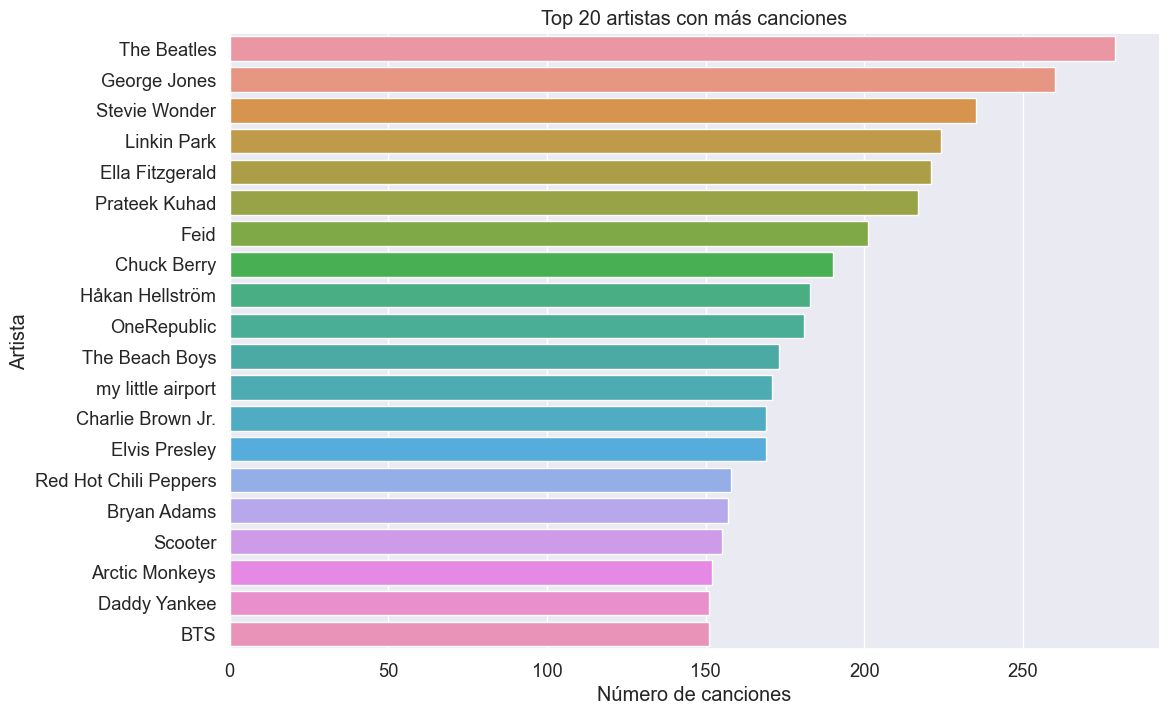

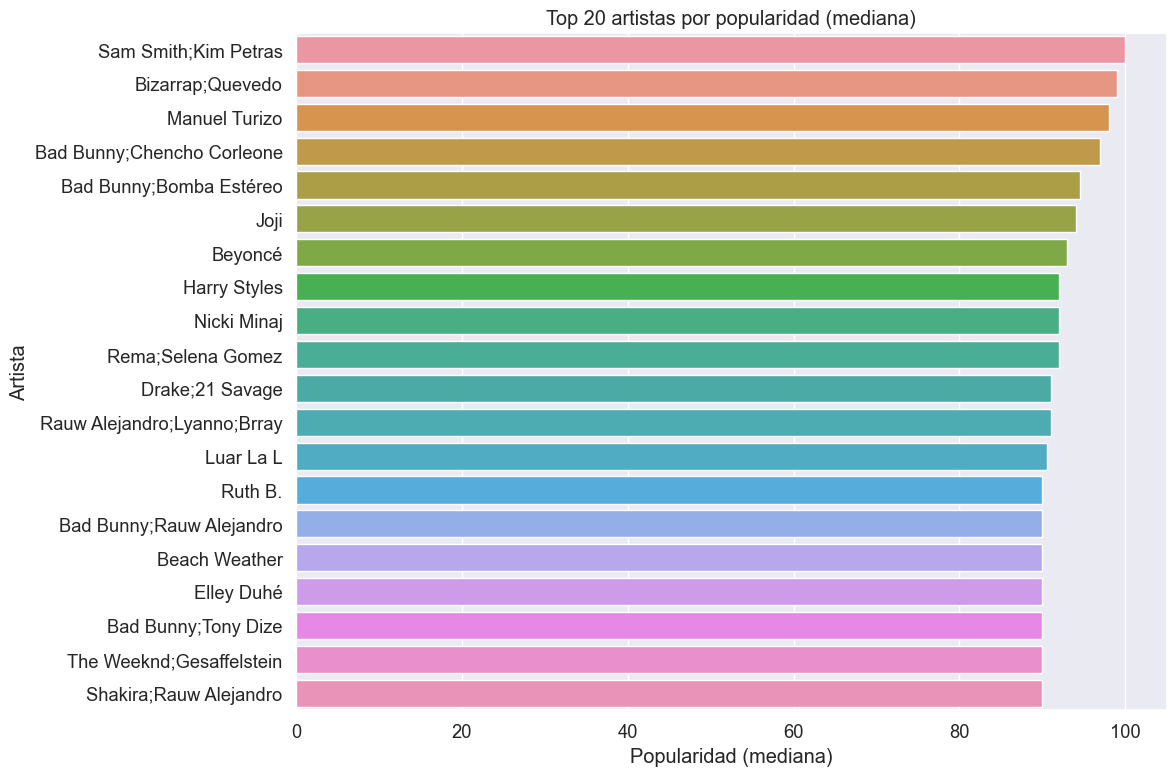

In [116]:
# Análisis de artistas
top_artists = df['artists'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_artists.index, x=top_artists.values)
plt.title('Top 20 artistas con más canciones')
plt.xlabel('Número de canciones')
plt.ylabel('Artista')
plt.show()
artist_popularity = df.groupby('artists')['popularity'].median().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=artist_popularity.index, x=artist_popularity.values)
plt.title('Top 20 artistas por popularidad (mediana)')
plt.xlabel('Popularidad (mediana)')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

Algunas características del top de artistas con más canciones son: 

- The Beatles: lideran con aprox. 250 canciones
- George Jones 
- Stevie Wonder

Y artistas nuevos como BTS llegan al top dando una revolución e impacto global en la música.

Pero algo interesante es que la cantidad de canciones no influye en su popularidad pues hay artistas como Bad Bunny que tiene menos canciones que The Beatles, pero tiene una mayor popularidad.

En el top de artistas por popularidad tenemos a Bad Bunny, The Weeknd, Beyoncé, Harry Styles, por lo cual música actual tiene una mezcla de estos géneros: reggaetón, pop y electrónica.

También las colaboraciones entre artistas aumentan la posibilidad de llegar a tener mayor popularidad, como los dúos.

Y como características de estos artistas es que tienen más sencillos que albumen largos, por lo que las disqueras pueden aumentar su popularidad cambiando esta estrategia comercial a una disco más corto. Por lo que las disqueras podrían priorizar lanzamientos de sencillos en lugar de álbumes largos.

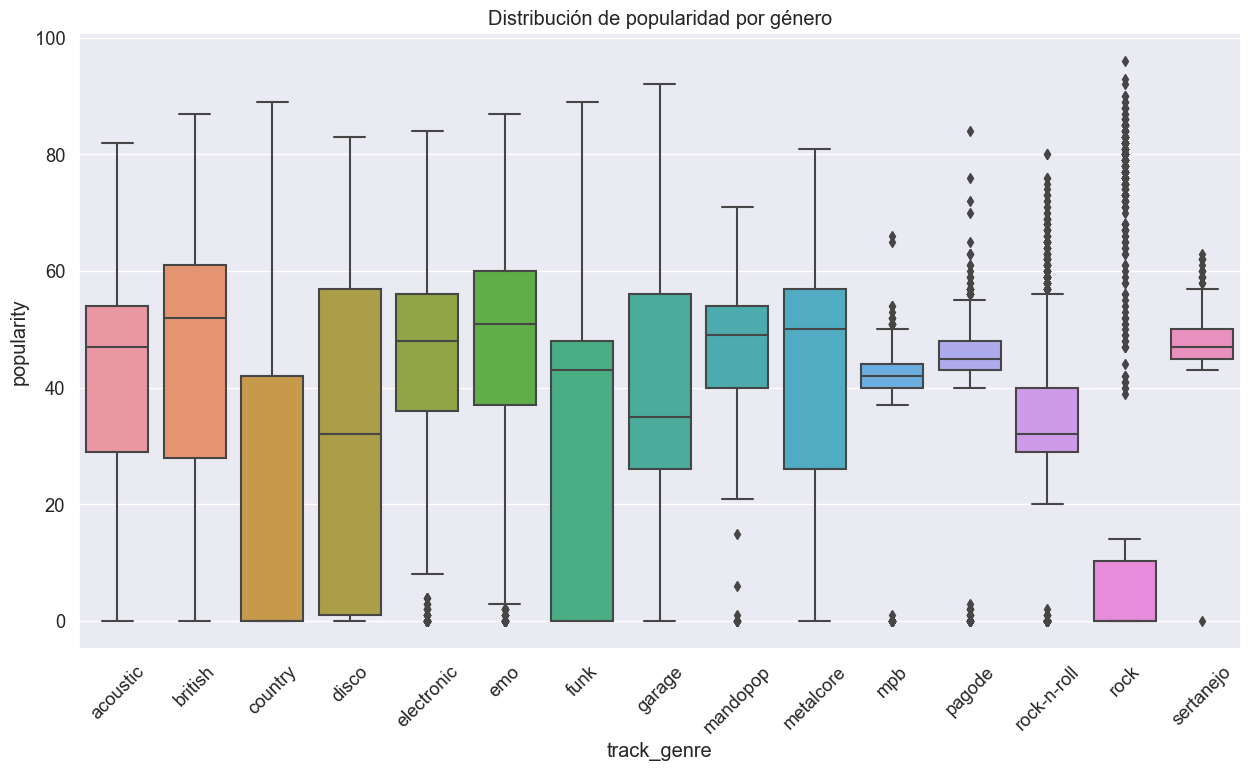

In [117]:
# Boxplot por género
plt.figure(figsize=(15, 8))
top_genres = df['track_genre'].value_counts().head(15).index
sns.boxplot(data=df[df['track_genre'].isin(top_genres)], 
            x='track_genre', y='popularity')
plt.title('Distribución de popularidad por género')
plt.xticks(rotation=45)
plt.show()

Podemos observar que géneros como acoustic, disco, emo, electronic, funk y metalcore tienen una mediana alta casi llegando a 50. También géneros como mandopop, metalcore, garage tienen una distribución muy amplia, lo que indica que hay canciones muy populares y otras poco populares.

Mientras que el reggaeton tieen alta variabilidad y outliers hacia arriba, por lo cual hay excepciones, es decir, canciones que alcanzan más popularidad que el promedio.

Y por géneros como mpb, pagode, punk-rock, r&b, electronic y funk tienen cajas muy estrechas, es decir, una popularidad sin muchos cambios a lo largo de estas canciones.

Por lo tanto, un género único o primordial no existe porque hay una variabilidad alta y extensa que una competencia en cómo llegar a tener canciones populares..

Luego abarcamos los contenidos explícitos de algunos albumes de estos artistas y en cómo afecta su la popularidad en las listas. Además, evaluamos la bailabilidad y la energía de estas canciones y que pueden influir en alcanzar una mayor popularidad:

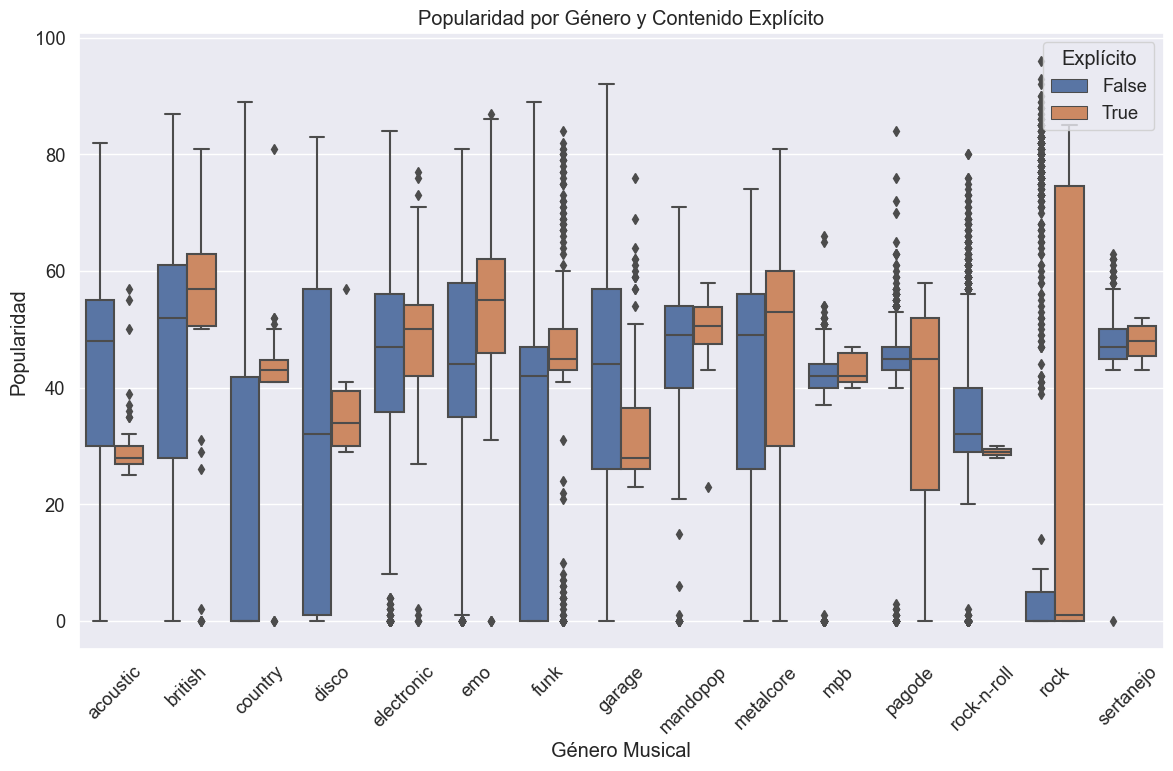

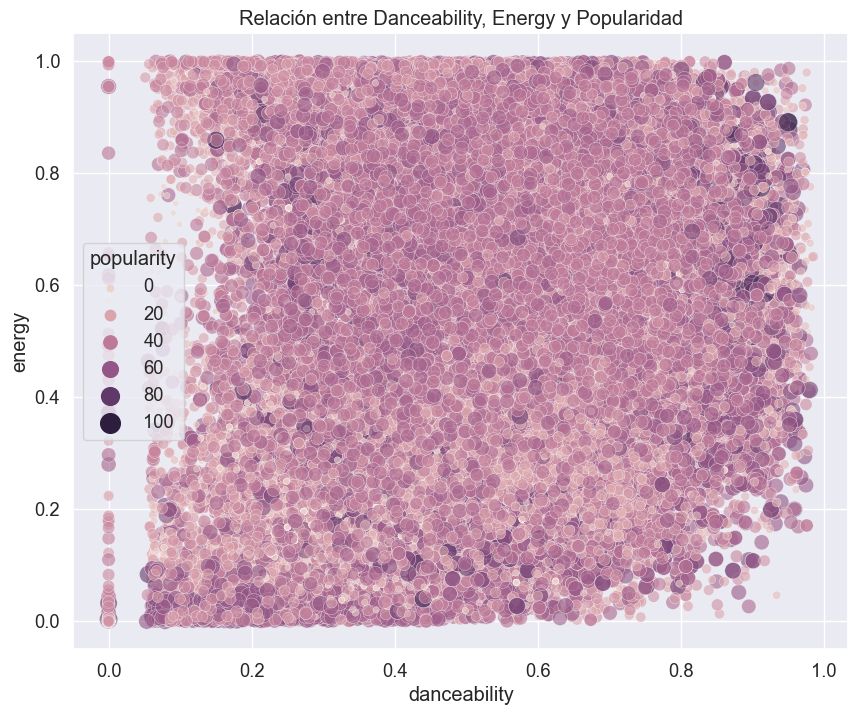

In [118]:
# Popularidad por género y explicit content
plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', hue='explicit', 
            data=df[df['track_genre'].isin(top_genres)])
plt.title('Popularidad por Género y Contenido Explícito')
plt.xlabel('Género Musical')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.legend(title='Explícito')
plt.show()

# Relación entre popularity, danceability y energy
plt.figure(figsize=(10, 8))
sns.scatterplot(x='danceability', y='energy', size='popularity', 
                hue='popularity', data=df, alpha=0.6, sizes=(20, 200))
plt.title('Relación entre Danceability, Energy y Popularidad')
plt.show()


Algunas repercuciones en el cotenido explicito de algunas canciones y su popularidad sí están relacionadas pues las canciones explícitas tienden a ser más populares, como podemos ver en géneros como emo, metalcore, reggaeton r-n-b pues tienen una mediana más alta que las no explícitas, contrario al caso de los géneros mpb y pagode, que no muestran ningún hallazgo de temas explícitos y los no explícitos.

Mientras que para géneros como acoustic, disco, garage y rock-n-roll no son muy populares por sus temas explícitos.

Y géneros como funk, mandopop, punk-rock y country no tienen diferencias marcadas entre sus canciones explícitas y las no explícitas.

Por tanto, la presencia de contenido explícito puede generar un aumento en la popularidad de la canción pero se sigue viendo una variabilidad en los géneros afecta mucho que resurgan este tipo de vocabulario.

En cuanto a la relación entre la bailabilidad y la energía muchas canciones tienden a ser tanto bailables como energéticas pues, como dijimos antes, hay una correlación entre alta energía y bailabilidad con alta popularidad.

Pero existen canciones con baja energía o bailabilidad que también logran buena popularidad en el centro de la gráfica, por lo que no son factores exclusivos pero si influyen significativamente en que tengan una mayor popularidad.

Como último esquema del EDA, vamos a hacer un análisis de Regresión logística

=== Logistic Regression (class_weight='balanced') ===
Accuracy:  0.5526
Precision: 0.0664
Recall:    0.6344
F1 Score:  0.1202
AUC-ROC:   0.6165

Confusion Matrix:
 [[11856  9760]
 [  400   694]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.55      0.70     21616
           1       0.07      0.63      0.12      1094

    accuracy                           0.55     22710
   macro avg       0.52      0.59      0.41     22710
weighted avg       0.92      0.55      0.67     22710



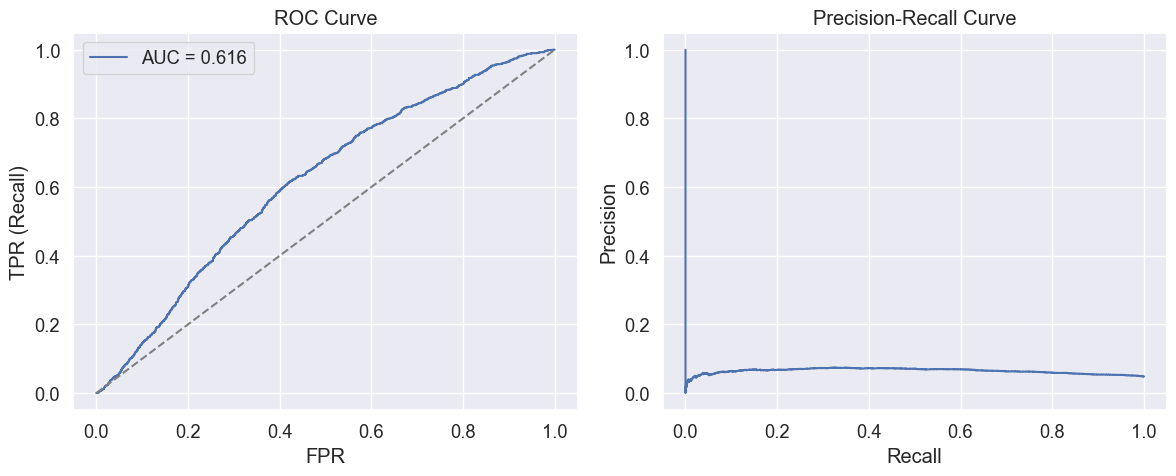


Top 5 thresholds según F1:


,threshold,accuracy,precision,recall,f1
54,0.55,0.695509,0.072425,0.450640,0.124794
51,0.52,0.609203,0.069492,0.574040,0.123976
50,0.51,0.581066,0.068736,0.613346,0.123618
55,0.56,0.723822,0.072772,0.403108,0.123288
53,0.54,0.668604,0.070628,0.483547,0.123253


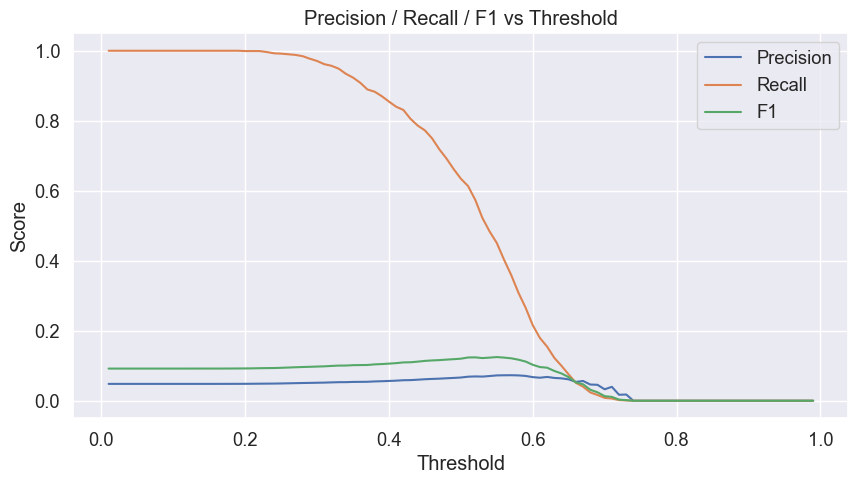


Coeficientes y Odds Ratios (ordenados por efecto):


,feature,coef,odds_ratio
4,acousticness,-0.477646,0.620242
0,danceability,0.286651,1.331960
1,energy,-0.180912,0.834509
3,tempo,-0.091542,0.912523
2,valence,0.005926,1.005944



Mejor umbral por F1: 0.550 con F1=0.125
Ejemplo de umbral con recall ≥ 0.8: {'threshold': 0.43, 'accuracy': 0.3718626155878468, 'precision': 0.05899685260831715, 'recall': 0.8053016453382084, 'f1': 0.10993947713233918}


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, precision_recall_curve
)
import joblib  
from IPython.display import display

features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness']  
df['popular'] = (df['popularity'] >= 70).astype(int)


X = df[features].copy()
y = df['popular'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model = LogisticRegression(max_iter=3000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

joblib.dump(model, "logistic_model_class_weight_balanced.joblib")
joblib.dump(scaler, "scaler.joblib")

y_pred  = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
roc  = roc_auc_score(y_test, y_proba)

print("=== Logistic Regression (class_weight='balanced') ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

fpr, tpr, roc_thresh = roc_curve(y_test, y_proba)
precisions, recalls, pr_thresh = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f'AUC = {roc:.3f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.tight_layout()
plt.show()

thresholds = np.linspace(0.01, 0.99, 99)
metrics = []

for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    metrics.append({
        'threshold': thr,
        'accuracy': accuracy_score(y_test, y_pred_thr),
        'precision': precision_score(y_test, y_pred_thr, zero_division=0),
        'recall': recall_score(y_test, y_pred_thr, zero_division=0),
        'f1': f1_score(y_test, y_pred_thr, zero_division=0)
    })

metrics_df = pd.DataFrame(metrics)

print("\nTop 5 thresholds según F1:")
display(metrics_df.sort_values('f1', ascending=False).head(5))

plt.figure(figsize=(10,5))
plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['f1'], label='F1')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision / Recall / F1 vs Threshold')
plt.show()

coef = model.coef_.ravel()
odds_ratio = np.exp(coef)

coef_df = pd.DataFrame({
    'feature': features,
    'coef': coef,
    'odds_ratio': odds_ratio
}).sort_values(by='odds_ratio', key=lambda s: abs(s - 1), ascending=False)

print("\nCoeficientes y Odds Ratios (ordenados por efecto):")
display(coef_df)

best_f1_row = metrics_df.loc[metrics_df['f1'].idxmax()]
print(f"\nMejor umbral por F1: {best_f1_row['threshold']:.3f} con F1={best_f1_row['f1']:.3f}")

rec80 = metrics_df[metrics_df['recall'] >= 0.8]
if not rec80.empty:
    chosen = rec80.sort_values('precision', ascending=False).iloc[0]
    print("Ejemplo de umbral con recall ≥ 0.8:", chosen.to_dict())
else:
    print("No hay umbral que logre recall ≥ 0.8 sin sacrificar demasiada precisión.")

metrics_df.to_csv("threshold_metrics.csv", index=False)
coef_df.to_csv("logistic_coef_odds.csv", index=False)

Características de TN, FP, FN, TP.

Una caraterística que muestran estos resultados es que, por ejemplo, un alto FN significa que el modelo no detecta muchos hits o éxitos.

Por tanto, si Spotify quiere maximizar descubrimiento de posibles hits se debe priorizar Recall, es decir, capturar la mayor cantidad de canciones con potencial. Pero si no quisiera gastar presupuesto en música que no pegue o sea la más popular en listas, priorizar Precision cuando quiera promocionar, es decir, que tenga alta probabilidad de éxito.

Por otro lado, los coeficientes positivos aumentan la popularidad mientras que los coeficientes negativos la reducen.

Una característica fundamental que va directamente ligada a los usuarios, y que puede incremetar no solo la popularidad del artista, sino también de la app, es la segmentación de usuarios porque combina predisposición de track con perfiles de usuarios para darles recomendaciones más efectivas y que les guste. Ahora, si la predicción de popularidad ayuda a reducir el gasto en promoción en tracks sin potencial, mejora RO, por lo que usar el modelo para proponer experimentos (como colocar X canciones en una playlist) y medir lift de streams, así ayuda a entender y corregir sesgos algorítmicos.

Pero para cumplir con esta idea faltarían comportamientos externos por analizar, como fecha de lanzamiento, de marketing como las campañas publicitarias y propagandas, metadatos geográficos o demográficos de audiencia.

In [120]:
# Resumen de hallazgos
print("\nResumen de hallazgos:")
print(f"- Cantidad total de géneros únicos: {df['track_genre'].nunique()}")
print(f"- Género más popular en promedio: {popularity_by_genre.idxmax()} ({popularity_by_genre.max():.2f})")
print(f"- Género menos popular en promedio: {popularity_by_genre.idxmin()} ({popularity_by_genre.min():.2f})")
print("- Variables más correlacionadas con popularidad:")
print(corr.sort_values(ascending=False).head(5))


Resumen de hallazgos:
- Cantidad total de géneros únicos: 114
- Género más popular en promedio: pop-film (59.28)
- Género menos popular en promedio: iranian (2.22)
- Variables más correlacionadas con popularidad:
loudness        0.047371
danceability    0.034412
tempo           0.012180
energy         -0.002444
liveness       -0.005658
Name: popularity, dtype: float64


Concluimos que hay mucha diversidad musical hoy en día pues hay 114 géneros bien representados.
Contiene una distribución balanceada de géneros y una distribución asimétrica de popularidad, lo que sugiere que todos los géneros tienen oportunidad pero pocos alcanzan esa máxima popularidad.

Este EDA representa la diversidad musical actual. Captura la dinámica competitiva de la industria que ofrece oportunidades para ver patrones en ciertos géneros, poder predecir un éxito musical y optimizar recomendaciones.

Los hallazgos no solo muestras las preferencias de las personas del mundo, sino que también las herramientas para los artistas, productores y plataformas digitales o streaming necesitas pues la música va a seguir creciendo y con ello tenemos muchos aspectos con los cuales poder seguir investigando las futuras tendencias.



Tamaño original: (90840, 15)
Proporción de clases: [0.95184941 0.04815059]
=== GRID SEARCH REGRESIÓN LOGÍSTICA ===
C=0.01, penalty=l2: Recall CV = 0.5770
C=0.01, penalty=None: Recall CV = 0.6728
C=0.1, penalty=l2: Recall CV = 0.6571
C=0.1, penalty=None: Recall CV = 0.6728
C=1, penalty=l2: Recall CV = 0.6710
C=1, penalty=None: Recall CV = 0.6728
C=10, penalty=l2: Recall CV = 0.6722
C=10, penalty=None: Recall CV = 0.6728
C=100, penalty=l2: Recall CV = 0.6733
C=100, penalty=None: Recall CV = 0.6728

Mejores parámetros: {'C': 100, 'penalty': 'l2'}
Mejor recall (CV): 0.6733
Tamaño con SMOTE: (129699, 129)

EVALUACIÓN EN TEST - REGRESIÓN LOGÍSTICA

Accuracy en test: 0.8326728313518273

Confusion Matrix:
 [[18193  3423]
 [  377   717]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91     21616
           1       0.17      0.66      0.27      1094

    accuracy                           0.83     22710
   macro avg      

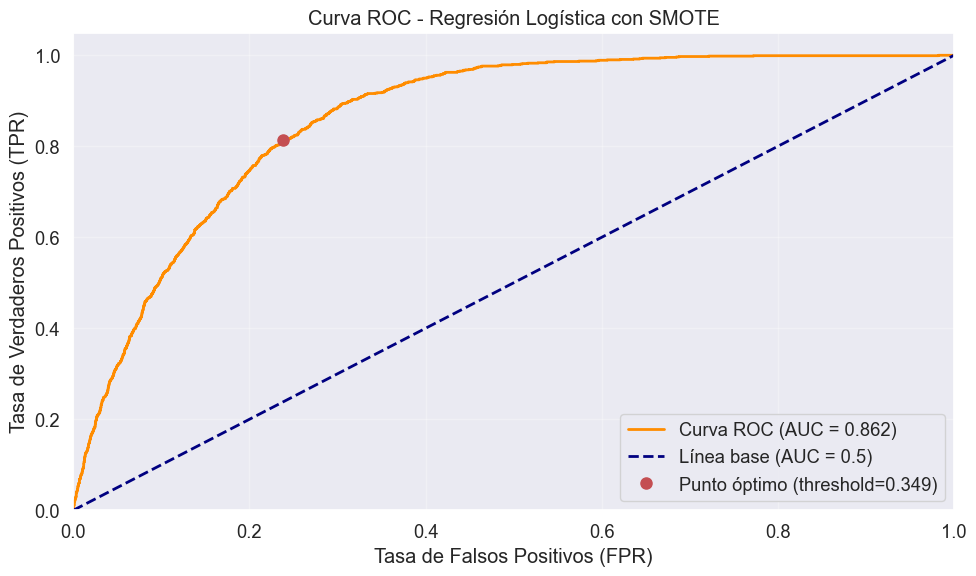


Threshold óptimo: 0.349

Classification Report con threshold óptimo:
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     21616
           1       0.15      0.81      0.25      1094

    accuracy                           0.76     22710
   macro avg       0.57      0.79      0.55     22710
weighted avg       0.95      0.76      0.83     22710

Confusion Matrix con threshold óptimo:
[[16459  5157]
 [  203   891]]


In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score, roc_curve, auc
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ============================================================
# 🔹 1. Variables
# ============================================================
numeric_features = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature'
]
categorical_features = ['explicit', 'track_genre']

dataset_clean = df.copy()
dataset_clean['HighPopularity'] = (dataset_clean['popularity'] >= 70).astype(int)

X = dataset_clean[numeric_features + categorical_features]
y = dataset_clean['HighPopularity']

# ============================================================
# 🔹 2. División Train/Test
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================
# 🔹 3. Preprocesamiento
# ============================================================

# --- Numéricas ---
num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train[numeric_features])
X_test_num = num_imputer.transform(X_test[numeric_features])

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# --- Categóricas ---
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
X_test_cat = cat_imputer.transform(X_test[categorical_features])

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# --- Unir numéricas + categóricas ---
X_train_final = hstack([X_train_num_scaled, X_train_cat_encoded])
X_test_final = hstack([X_test_num_scaled, X_test_cat_encoded])

# Convertir a array denso
X_train_dense = X_train_final.toarray()
X_test_dense = X_test_final.toarray()

print(f"Tamaño original: {X_train.shape}")
print(f"Proporción de clases: {np.bincount(y_train)/len(y_train)}")

# ============================================================
# 🔹 4. GridSearchCV personalizado con SMOTE en cada fold (Regresión Logística)
# ============================================================
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    "penalty": ['l2', None]  # Tipo de regularización
}

# Crear CV estratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_params = {}
best_score = 0

print("=== GRID SEARCH REGRESIÓN LOGÍSTICA ===")
for C in param_grid['C']:
    for penalty in param_grid['penalty']:
        # Saltar combinación inválida
        if penalty == 'none' and C != 1.0:
            continue
            
        fold_scores = []
        
        # Iterar sobre folds
        for train_idx, val_idx in cv.split(X_train_dense, y_train):
            # Dividir en train/validation para este fold
            X_fold_train, X_fold_val = X_train_dense[train_idx], X_train_dense[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            # 🔹 APLICAR SMOTE SOLO AL TRAINING DEL FOLD ACTUAL
            smote = SMOTE(sampling_strategy=0.5, random_state=42)
            X_fold_res, y_fold_res = smote.fit_resample(X_fold_train, y_fold_train)
            
            # Entrenar y evaluar
            logreg = LogisticRegression(
                C=C, 
                penalty=penalty, 
                solver='saga' if penalty == 'l1' else 'lbfgs',
                max_iter=1000,
                random_state=42
            )
            logreg.fit(X_fold_res, y_fold_res)
            y_pred_val = logreg.predict(X_fold_val)
            
            # Calcular recall
            score = recall_score(y_fold_val, y_pred_val)
            fold_scores.append(score)
        
        # Promedio de scores para este parámetro
        mean_score = np.mean(fold_scores)
        print(f"C={C}, penalty={penalty}: Recall CV = {mean_score:.4f}")
        
        if mean_score > best_score:
            best_score = mean_score
            best_params = {'C': C, 'penalty': penalty}

print(f"\nMejores parámetros: {best_params}")
print(f"Mejor recall (CV): {best_score:.4f}")

# ============================================================
# 🔹 5. Entrenar modelo final con mejor parámetro
# ============================================================
# Aplicar SMOTE al training completo para el modelo final
smote_final = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote_final.fit_resample(X_train_dense, y_train)

print(f"Tamaño con SMOTE: {X_train_res.shape}")

# Entrenar modelo final
best_logreg = LogisticRegression(
    **best_params, 
    solver='saga' if best_params['penalty'] == 'l1' else 'lbfgs',
    max_iter=1000,
    random_state=42
)
best_logreg.fit(X_train_res, y_train_res)

# ============================================================
# 🔹 6. Evaluación en test y gráfica ROC AUC
# ============================================================
y_pred = best_logreg.predict(X_test_dense)
y_pred_proba = best_logreg.predict_proba(X_test_dense)[:, 1]

# Calcular métricas
print("\n" + "="*50)
print("EVALUACIÓN EN TEST - REGRESIÓN LOGÍSTICA")
print("="*50)
print("\nAccuracy en test:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# ============================================================
# 🔹 7. Gráfica ROC AUC
# ============================================================
# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Crear gráfica
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística con SMOTE')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Añadir punto óptimo (punto más cercano a esquina superior izquierda)
distances = np.sqrt(fpr**2 + (1-tpr)**2)
optimal_idx = np.argmin(distances)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=8, 
         label=f'Punto óptimo (threshold={optimal_threshold:.3f})')

plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# 🔹 8. Análisis adicional con threshold óptimo
# ============================================================
print(f"\nThreshold óptimo: {optimal_threshold:.3f}")
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print("\nClassification Report con threshold óptimo:")
print(classification_report(y_test, y_pred_optimal))

print("Confusion Matrix con threshold óptimo:")
print(confusion_matrix(y_test, y_pred_optimal))

KNN

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE

# ============================================================
# 🔹 1. Variables
# ============================================================
numeric_features = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature'
]
categorical_features = ['explicit', 'track_genre']

dataset_clean = df.copy()
dataset_clean['HighPopularity'] = (dataset_clean['popularity'] >= 70).astype(int)

X = dataset_clean[numeric_features + categorical_features]
y = dataset_clean['HighPopularity']

# ============================================================
# 🔹 2. División Train/Test
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================
# 🔹 3. Preprocesamiento
# ============================================================

# --- Numéricas ---
num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train[numeric_features])
X_test_num = num_imputer.transform(X_test[numeric_features])

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# --- Categóricas ---
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
X_test_cat = cat_imputer.transform(X_test[categorical_features])

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# --- Unir numéricas + categóricas ---
X_train_final = hstack([X_train_num_scaled, X_train_cat_encoded])
X_test_final = hstack([X_test_num_scaled, X_test_cat_encoded])

# Convertir a array denso
X_train_dense = X_train_final.toarray()
X_test_dense = X_test_final.toarray()

print(f"Tamaño original: {X_train.shape}")

# ============================================================
# 🔹 4. GridSearchCV personalizado con SMOTE en cada fold
# ============================================================
param_grid = {"n_neighbors": [1,3,5,7,9,11,13,15,17,19,21]}

# Crear CV estratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar resultados
cv_scores = []

# Iterar sobre parámetros
for n_neighbors in param_grid['n_neighbors']:
    fold_scores = []
    
    # Iterar sobre folds
    for train_idx, val_idx in cv.split(X_train_dense, y_train):
        # Dividir en train/validation para este fold
        X_fold_train, X_fold_val = X_train_dense[train_idx], X_train_dense[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # 🔹 APLICAR SMOTE SOLO AL TRAINING DEL FOLD ACTUAL
        smote = SMOTE(sampling_strategy=0.5, random_state=42)
        X_fold_res, y_fold_res = smote.fit_resample(X_fold_train, y_fold_train)
        
        # Entrenar y evaluar
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_fold_res, y_fold_res)
        y_pred_val = knn.predict(X_fold_val)
        
        # Calcular recall (o la métrica que prefieras)
        score = recall_score(y_fold_val, y_pred_val)
        fold_scores.append(score)
    
    # Promedio de scores para este parámetro
    mean_score = np.mean(fold_scores)
    cv_scores.append(mean_score)
    print(f"n_neighbors={n_neighbors}: Recall CV = {mean_score:.4f}")

# Encontrar mejor parámetro
best_n_neighbors = param_grid['n_neighbors'][np.argmax(cv_scores)]
print(f"\nMejor parámetro: n_neighbors={best_n_neighbors}")
print(f"Mejor recall (CV): {np.max(cv_scores):.4f}")

# ============================================================
# 🔹 5. Entrenar modelo final con mejor parámetro
# ============================================================
# Aplicar SMOTE al training completo para el modelo final
smote_final = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote_final.fit_resample(X_train_dense, y_train)

print(f"Tamaño con SMOTE: {X_train_res.shape}")

# Entrenar modelo final
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train_res, y_train_res)

# ============================================================
# 🔹 6. Evaluación en test
# ============================================================
y_pred = best_knn.predict(X_test_dense)
y_pred_proba = best_knn.predict_proba(X_test_dense)[:, 1]

print("\nAccuracy en test:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Tamaño original: (90840, 15)
n_neighbors=1: Recall CV = 0.4225
n_neighbors=3: Recall CV = 0.5597
n_neighbors=5: Recall CV = 0.6360
n_neighbors=7: Recall CV = 0.6829
n_neighbors=9: Recall CV = 0.7140
n_neighbors=11: Recall CV = 0.7355
n_neighbors=13: Recall CV = 0.7478
n_neighbors=15: Recall CV = 0.7583
n_neighbors=17: Recall CV = 0.7627
n_neighbors=19: Recall CV = 0.7659
n_neighbors=21: Recall CV = 0.7643

Mejor parámetro: n_neighbors=19
Mejor recall (CV): 0.7659
Tamaño con SMOTE: (129699, 129)

Accuracy en test: 0.7647291941875826

Confusion Matrix:
 [[16516  5100]
 [  243   851]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     21616
           1       0.14      0.78      0.24      1094

    accuracy                           0.76     22710
   macro avg       0.56      0.77      0.55     22710
weighted avg       0.94      0.76      0.83     22710

ROC AUC: 0.853761331236798



Varianza explicada por cada componente: [0.20933896 0.10930794]
Varianza total explicada: 0.319


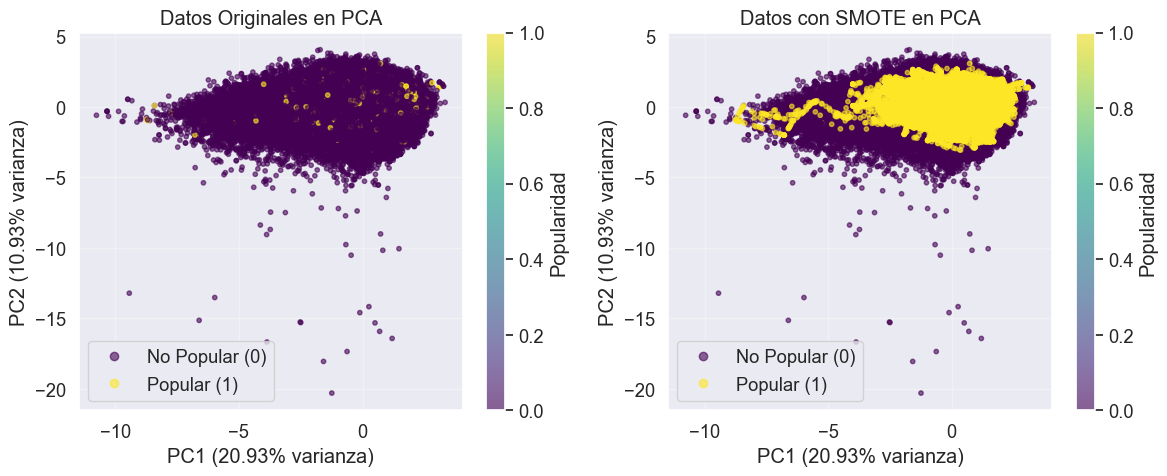

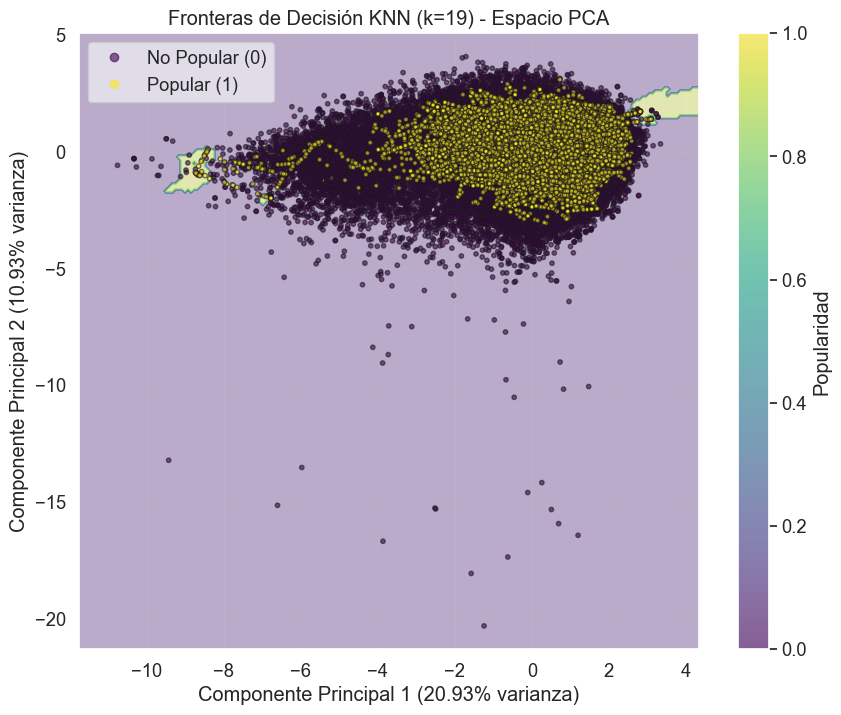

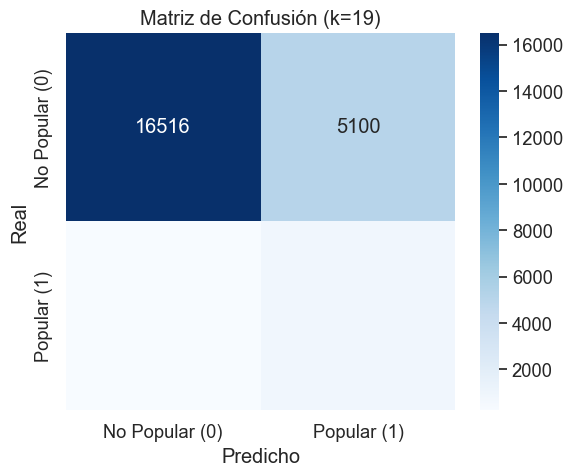

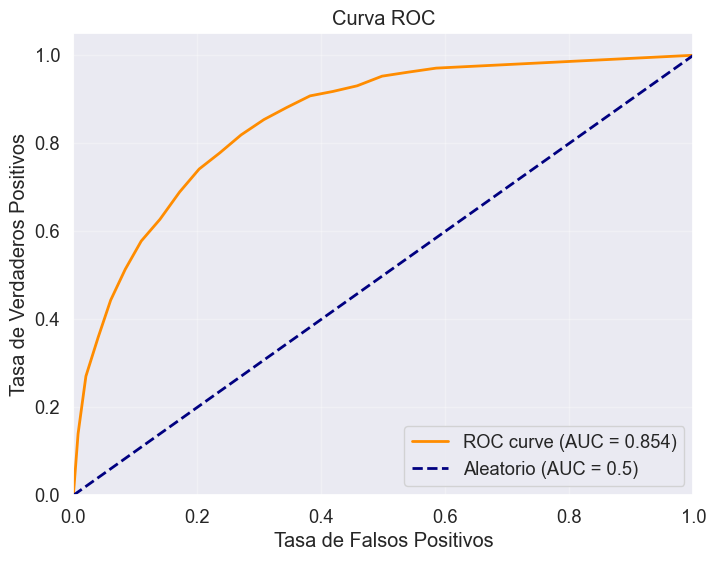

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

# ============================================================
# 🔹 8. VISUALIZACIÓN CON PCA (SOLO GRÁFICAS)
# ============================================================

# Aplicar PCA a los datos de entrenamiento procesados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_dense)

print(f"\nVarianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.3f}")

# Graficar datos originales en 2D
plt.figure(figsize=(12, 5))

# Subplot 1: Datos originales
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6, s=10)
plt.title('Datos Originales en PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.legend(handles=scatter1.legend_elements()[0], 
           labels=['No Popular (0)', 'Popular (1)'])
plt.colorbar(label='Popularidad')
plt.grid(True, alpha=0.3)

# Subplot 2: Datos con SMOTE
plt.subplot(1, 2, 2)
X_res_pca = pca.transform(X_train_res)  # Transformar datos con SMOTE
scatter2 = plt.scatter(X_res_pca[:, 0], X_res_pca[:, 1], c=y_train_res, cmap='viridis', alpha=0.6, s=10)
plt.title('Datos con SMOTE en PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.legend(handles=scatter2.legend_elements()[0], 
           labels=['No Popular (0)', 'Popular (1)'])
plt.colorbar(label='Popularidad')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 🔹 9. Fronteras de decisión en espacio PCA
# ============================================================

# Entrenar KNN en el espacio PCA de datos con SMOTE
knn_pca = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_pca.fit(X_res_pca, y_train_res)

# Crear meshgrid para las fronteras
x_min, x_max = X_res_pca[:, 0].min() - 1, X_res_pca[:, 0].max() + 1
y_min, y_max = X_res_pca[:, 1].min() - 1, X_res_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predecir en el meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar fronteras de decisión
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_res_pca[:, 0], X_res_pca[:, 1], c=y_train_res, cmap='viridis', 
                     alpha=0.6, s=10, edgecolor='k')
plt.title(f'Fronteras de Decisión KNN (k={best_n_neighbors}) - Espacio PCA')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['No Popular (0)', 'Popular (1)'])
plt.colorbar(label='Popularidad')
plt.grid(True, alpha=0.3)
plt.show()

# ============================================================
# 🔹 10. Matriz de confusión con heatmap
# ============================================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Popular (0)', 'Popular (1)'], 
            yticklabels=['No Popular (0)', 'Popular (1)'])
plt.title(f"Matriz de Confusión (k={best_n_neighbors})")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# ============================================================
# 🔹 11. Curva ROC
# ============================================================
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()



